In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### About Dataset
Mobile Price Classification
Prabhat has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Prabhat wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is.

Data Dictionary
Here's a brief version of what you'll find in the data description file.

Variable Description
pc Primary Camera mega pixels 

fc Front Camera mega pixels

sc_h Screen Height of mobile in cm

sc_w Screen Width of mobile in cm

m_dep Mobile Depth in cm

px_width Pixel Resolution Width

px_height Pixel Resolution Height

ram Random Access Memory in Mega Bytes

int_memory Internal Memory in Giga Bytes

four_g Has 4G or not

three_g Has 3G or not

dual_sim Has dual sim support or not

battery_power Total energy a battery can store in one time measured in mAh

touch_screen Has touch screen or not

clock_speed speed at which microprocessor executes instructions

n_cores Number of cores of processor

wifi Has wifi or not

blue Has bluetooth or not

mobile_wt Weight of mobile phone

talk_time longest time that a single battery charge will last when you are

price_range This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [63]:
df=pd.read_csv('train[1].csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

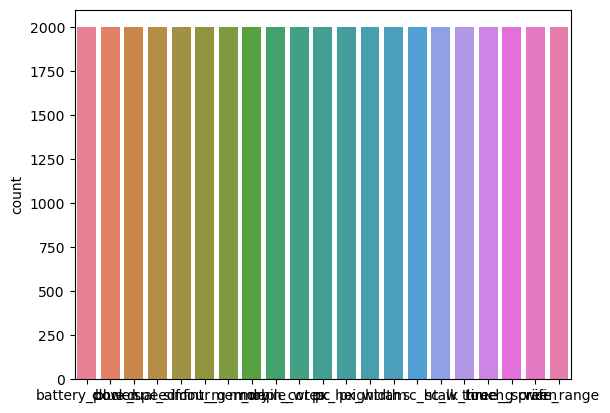

In [7]:
# import missingno as msno
import matplotlib.pyplot as plt
sns.countplot(df)
plt.show()

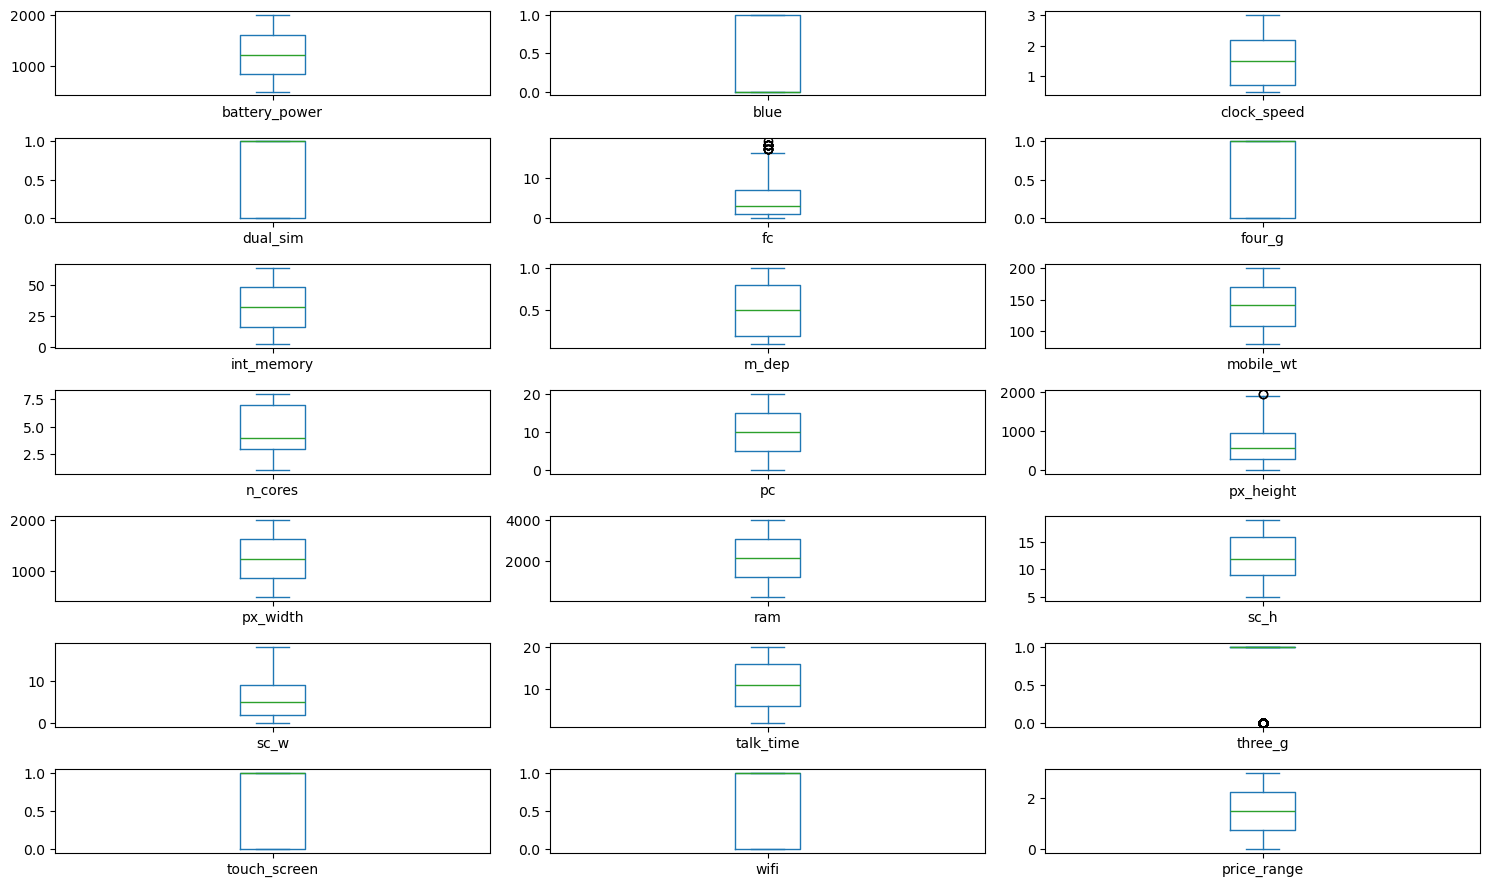

In [8]:
df.plot(kind='box', subplots=True, layout=(int(len(df.columns)/3)+1, 3), figsize=(15,10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

### here box show that in the data set there same outyler in fc( Front Camera mega pixels) columns but we not consider has outyler


Text(0.5, 1.0, 'Correlation ')

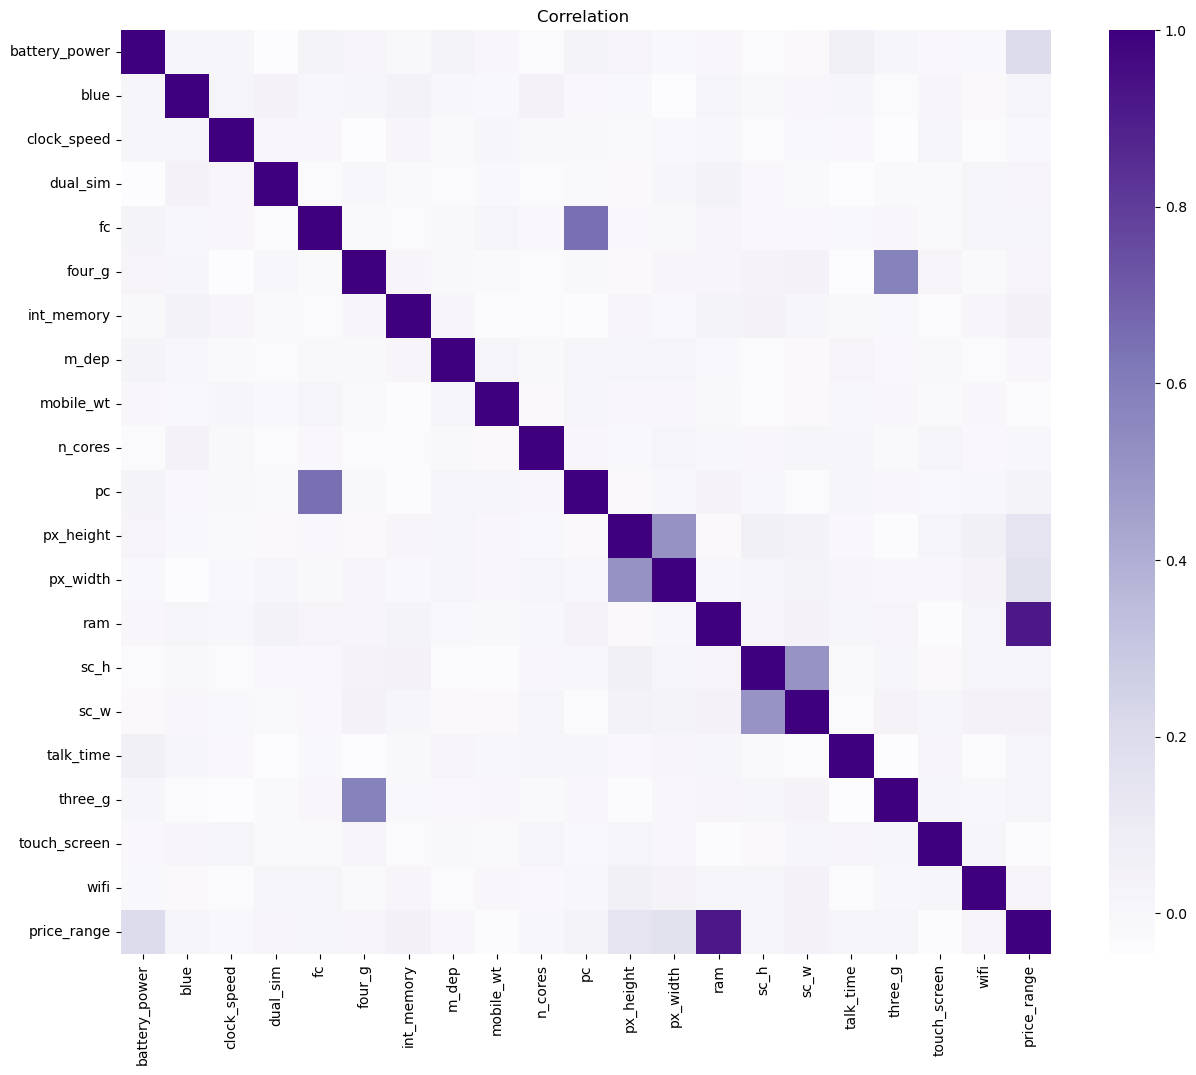

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

As we can see our target price range has highly positive correlation between ram.

In [10]:
#price range correlation
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [64]:
y = df["price_range"].values
x_data=df.drop(["price_range"],axis=1)

### spilte data into train and test

In [65]:
# x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.2,random_state=1)

In [66]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
816,805,1,0.7,0,0,0,64,0.1,97,4,14,641,704,418,11,6,17,0,1,1
790,911,1,2.9,0,0,0,46,0.1,181,5,1,461,670,363,9,5,17,0,1,0
361,899,0,0.5,1,13,1,57,0.9,172,2,18,788,1331,364,11,1,7,1,1,0
592,1263,0,0.5,0,12,0,64,0.3,175,5,18,178,1883,1183,14,3,17,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,1203,1,0.5,1,0,1,11,0.9,109,2,12,35,510,1672,17,13,19,1,1,0
1096,1154,0,2.0,0,6,1,35,0.8,159,5,16,1003,1827,3262,16,15,16,1,0,0
1932,718,1,1.6,1,1,1,30,0.4,93,3,12,662,997,1601,10,9,12,1,1,1
235,1523,1,1.8,0,6,1,11,0.1,129,1,8,148,1606,707,19,8,19,1,1,0


In [67]:
print(x_train.shape)
x_test.shape

(1600, 20)


(400, 20)

##### building svm model without scaling tha data 

In [68]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
pred=svm.predict(x_test)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.95375
test accuracy: 0.9425


In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
confusion_matrix(pred,y_test)


array([[91,  3,  0,  0],
       [ 1, 91,  7,  0],
       [ 0,  2, 96,  7],
       [ 0,  0,  3, 99]], dtype=int64)

In [71]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        94
           1       0.95      0.92      0.93        99
           2       0.91      0.91      0.91       105
           3       0.93      0.97      0.95       102

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



## and we best accuracy on test data  without scaling tha data

In [72]:
from sklehttp://localhost:8888/notebooks/Desktop/datamites/SVM_mobile_data.ipynb#and-we-best-accuracy-on-test-data--without-scaling-tha-dataarn.linear_model import LogisticRegression
lg=LogisticRegression()

In [73]:
lg.fit(x_train,y_train)

C:\Users\mvara\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
pred2=lg.predict(x_test)
pred2

array([0, 0, 2, 0, 2, 1, 1, 3, 2, 3, 0, 3, 1, 1, 3, 0, 1, 3, 1, 2, 3, 3,
       1, 2, 3, 1, 3, 3, 3, 2, 2, 0, 3, 0, 3, 3, 1, 0, 1, 0, 2, 0, 2, 1,
       0, 0, 3, 2, 3, 3, 1, 3, 1, 3, 2, 3, 2, 2, 3, 1, 0, 1, 1, 2, 2, 2,
       1, 2, 2, 3, 2, 3, 0, 3, 3, 0, 1, 1, 0, 0, 0, 3, 1, 3, 3, 3, 3, 0,
       1, 0, 3, 0, 1, 2, 1, 3, 3, 0, 3, 2, 3, 3, 1, 1, 3, 0, 1, 1, 0, 2,
       1, 3, 2, 1, 2, 2, 3, 1, 2, 1, 2, 0, 0, 0, 3, 0, 1, 0, 2, 1, 0, 2,
       0, 3, 2, 0, 3, 3, 1, 1, 0, 0, 2, 1, 0, 3, 0, 1, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 2, 2, 2, 1, 3, 2, 3, 2, 2, 1, 3, 3, 2, 0, 3, 1, 0, 3,
       3, 0, 1, 3, 1, 3, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 0, 1, 2, 3,
       3, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 1, 0, 3, 1, 0, 3, 0, 1, 0, 3, 1,
       0, 1, 3, 1, 3, 3, 0, 3, 1, 1, 2, 2, 3, 3, 2, 2, 1, 1, 3, 1, 3, 3,
       3, 3, 0, 0, 2, 0, 2, 3, 2, 0, 2, 3, 1, 3, 1, 3, 2, 0, 3, 1, 1, 2,
       2, 1, 3, 0, 3, 1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 3, 2, 3, 1, 3, 2, 0,
       0, 3, 0, 0, 2, 2, 1, 3, 0, 1, 1, 2, 3, 2, 1,

In [75]:
confusion_matrix(pred2,y_test)


array([[71, 16,  0,  0],
       [19, 52, 27,  0],
       [ 2, 25, 44, 27],
       [ 0,  3, 35, 79]], dtype=int64)

In [92]:
print(classification_report(pred2,y_test))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        87
           1       0.54      0.53      0.54        98
           2       0.42      0.45      0.43        98
           3       0.75      0.68      0.71       117

    accuracy                           0.61       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.62      0.61      0.62       400



### here logistic regression has very bad accuracy on same data we need to scaling down data using Standard Scaler but only battery_power	int_memory	mobile_wt	px_height	px_width	ram this columns

In [76]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [77]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [78]:
df2 = df[['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram']]
type(df2)
df2 = pd.DataFrame(df2)

In [79]:
X1=sc.fit_transform(df2)
X1

array([[-0.90259726, -1.38064353,  1.34924881, -1.40894856, -1.14678403,
         0.39170341],
       [-0.49513857,  1.15502422, -0.12005944,  0.58577791,  1.70446468,
         0.46731702],
       [-1.5376865 ,  0.49354568,  0.13424391,  1.39268422,  1.07496821,
         0.44149774],
       ...,
       [ 1.53077336,  0.21792962, -0.91122542,  0.50238257,  0.88056489,
         0.86013895],
       [ 0.62252745,  0.76916174,  0.13424391, -0.69670724, -1.34581601,
        -1.15745352],
       [-1.65833069,  0.71403853,  0.78413025, -0.3653798 , -1.15141268,
         1.65500399]])

In [80]:
X1 = pd.DataFrame(X1, columns=df2.columns)
X1

,battery_power,int_memory,mobile_wt,px_height,px_width,ram
0,-0.902597,-1.380644,1.349249,-1.408949,-1.146784,0.391703
1,-0.495139,1.155024,-0.120059,0.585778,1.704465,0.467317
2,-1.537686,0.493546,0.134244,1.392684,1.074968,0.441498
3,-1.419319,-1.215274,-0.261339,1.286750,1.236971,0.594569
4,1.325906,0.658915,0.021220,1.268718,-0.091452,-0.657666
...,...,...,...,...,...,...
1995,-1.011860,-1.656260,-0.967737,1.300273,1.477661,-1.342799
1996,1.653694,0.383299,1.320993,0.608317,1.651235,-0.085031
1997,1.530773,0.217930,-0.911225,0.502383,0.880565,0.860139
1998,0.622527,0.769162,0.134244,-0.696707,-1.345816,-1.157454


### replace sclaler data on in main df

In [82]:
df[['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram']] = X1

In [83]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,0,2.2,0,1,0,-1.380644,0.6,1.349249,2,...,-1.408949,-1.146784,0.391703,9,7,19,0,0,1,1
1,-0.495139,1,0.5,1,0,1,1.155024,0.7,-0.120059,3,...,0.585778,1.704465,0.467317,17,3,7,1,1,0,2
2,-1.537686,1,0.5,1,2,1,0.493546,0.9,0.134244,5,...,1.392684,1.074968,0.441498,11,2,9,1,1,0,2
3,-1.419319,1,2.5,0,0,0,-1.215274,0.8,-0.261339,6,...,1.286750,1.236971,0.594569,16,8,11,1,0,0,2
4,1.325906,1,1.2,0,13,1,0.658915,0.6,0.021220,2,...,1.268718,-0.091452,-0.657666,8,2,15,1,1,0,1


In [141]:
### now create new train and test 

In [85]:
y = df["price_range"].values
x_da=df.drop(["price_range"],axis=1)
# x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x_da,y,test_size = 0.2,random_state=1)

In [86]:
x1_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,0,2.2,0,1,0,-1.380644,0.6,1.349249,2,2,-1.408949,-1.146784,0.391703,9,7,19,0,0,1
816,-0.986821,1,0.7,0,0,0,1.761380,0.1,-1.222041,4,14,-0.009259,-1.267129,-1.573328,11,6,17,0,1,1
790,-0.745532,1,2.9,0,0,0,0.769162,0.1,1.151457,5,1,-0.414966,-1.345816,-1.624045,9,5,17,0,1,0
361,-0.772848,0,0.5,1,13,1,1.375517,0.9,0.897154,2,18,0.322068,0.183953,-1.623123,11,1,7,1,1,0
592,0.055727,0,0.5,0,12,0,1.761380,0.3,0.981922,5,18,-1.052828,1.461461,-0.867909,14,3,17,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,-0.080851,1,0.5,1,0,1,-1.160151,0.9,-0.882969,2,12,-1.375140,-1.716108,-0.416993,17,13,19,1,1,0
1096,-0.192390,0,2.0,0,6,1,0.162806,0.8,0.529827,5,16,0.806663,1.331858,1.049173,16,15,16,1,0,0
1932,-1.184859,1,1.6,1,1,1,-0.112810,0.4,-1.335064,3,12,0.038073,-0.589032,-0.482464,10,9,12,1,1,1
235,0.647567,1,1.8,0,6,1,-1.160151,0.1,-0.317851,1,8,-1.120446,0.820392,-1.306837,19,8,19,1,1,0


### logistic regreesion use aginn on scaler data

In [88]:
lg.fit(x1_train,y1_train)
pred_sc=lg.predict(x1_test)
pred_sc

C:\Users\mvara\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, 0, 2, 2, 0, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 0, 2, 0, 3, 3, 0, 0, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 3, 1, 0, 2, 0, 3, 2, 1,
       1, 2, 3, 2, 1, 2, 0, 3, 3, 0, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 0,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 2, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 1, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 2, 3, 2, 1,
       0, 2, 1, 0, 3, 1, 3, 1, 3, 2, 3, 1, 2, 2, 3, 2, 2, 0, 3, 2, 0, 3,
       3, 0, 0, 3, 0, 3, 1, 0, 2, 3, 3, 1, 2, 1, 2, 3, 2, 2, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 3, 2, 0, 2, 0, 1, 0, 2, 1,
       0, 1, 2, 2, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 3, 2, 3, 2,
       2, 1, 0, 1, 3, 0, 3, 3, 3, 1, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 3, 2, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 3, 3, 3, 1,

In [91]:
from sklearn.metrics import classification_report

print(classification_report(y1_test, pred_sc))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        92
           1       0.92      0.91      0.91        96
           2       0.91      0.91      0.91       106
           3       0.95      0.94      0.95       106

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [90]:
confusion_matrix(pred_sc,y1_test)

array([[ 89,   5,   0,   0],
       [  3,  87,   5,   0],
       [  0,   4,  96,   6],
       [  0,   0,   5, 100]], dtype=int64)

### seeeeeeeeeeeee the result is complitliy change after scaling